In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv
import math

In [17]:
file_name = 'D:\Data\Energinet.dk\Production_and_Consumption\Production_Consumption_DK1.csv'
reader = pd.read_csv(file_name, sep=', ')
reader.dtypes

C:\Users\kacha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Year                int64
Month               int64
Date                int64
Hr                  int64
GrossCon_MWhph    float64
NetCon_MWhph      float64
CHP_MWhph         float64
dtype: object

In [22]:
#---------------------------------------------------------
# check readability of data
#---------------------------------------------------------

#reader.GrossCon_MWhph
#reader.NetCon_MWhph
#reader.CHP_MWhph

#---------------------------------------------------------
# check for NaN
#---------------------------------------------------------

print(reader.GrossCon_MWhph.isnull().values.any())
print(reader.NetCon_MWhph.isnull().values.any())
print(reader.CHP_MWhph.isnull().values.any())

#---------------------------------------------------------
# check for statistical measures
#---------------------------------------------------------

reader.describe()

False
False
False


,Year,Month,Date,Hr,GrossCon_MWhph,NetCon_MWhph,CHP_MWhph
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2015.000548,6.523549,15.727820,11.500000,2320.401853,2249.357202,341.134537
std,1.414036,3.448572,8.799425,6.922266,475.409059,473.406999,154.746570
min,2013.000000,1.000000,1.000000,0.000000,1330.700000,1281.200000,137.700000
25%,2014.000000,4.000000,8.000000,5.750000,1926.600000,1855.200000,231.607500
50%,2015.000000,7.000000,16.000000,11.500000,2276.950000,2202.900000,290.900000
75%,2016.000000,10.000000,23.000000,17.250000,2710.112500,2638.805000,401.725000
max,2017.000000,12.000000,31.000000,23.000000,3672.200000,3615.900000,1144.100000


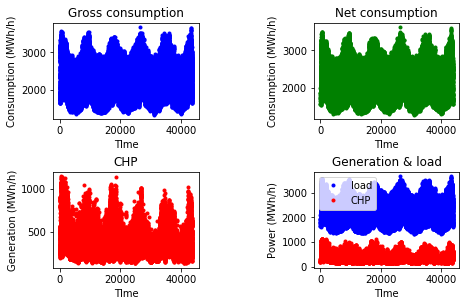

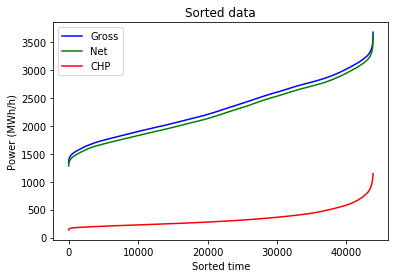

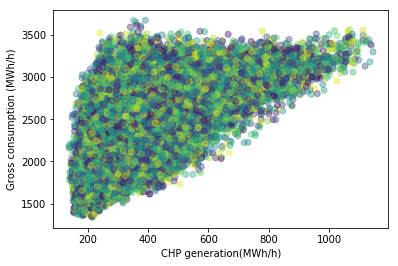

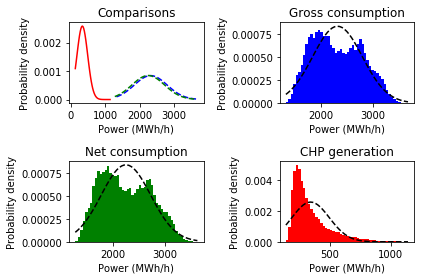

In [102]:
#---------------------------------------------------------
# analysis of complete time series, no filter
#---------------------------------------------------------

plt.figure(1)
plt.subplot(221)
plt.plot(reader.GrossCon_MWhph, 'b.')

plt.xlabel('TIme')
plt.ylabel('Consumption (MWh/h)')
plt.title('Gross consumption')

plt.subplot(222)
plt.plot(reader.NetCon_MWhph, 'g.')

plt.xlabel('TIme')
plt.ylabel('Consumption (MWh/h)')
plt.title('Net consumption')

plt.subplot(223)
plt.plot(reader.CHP_MWhph, 'r.')

plt.xlabel('TIme')
plt.ylabel('Generation (MWh/h)')
plt.title('CHP')

plt.subplot(224)
plt.plot(reader.GrossCon_MWhph, 'b.', label='load')
plt.plot(reader.CHP_MWhph, 'r.', label='CHP')

plt.legend()

plt.xlabel('TIme')
plt.ylabel('Power (MWh/h)')
plt.title('Generation & load')

plt.subplots_adjust(top=0.9, bottom=0.05, left=0.05, right=0.99, hspace=0.55, wspace=0.79)

#plt.show()

#---------------------------------------------------------
# Put in ascending order
#---------------------------------------------------------

reader_gross_asc = reader.sort_values('GrossCon_MWhph') # new dataframe columns sorted according to gross con
reader_net_asc = reader.sort_values('NetCon_MWhph')     # new dataframe columns sorted according to net con
reader_chp_asc = reader.sort_values('CHP_MWhph')        # new dataframe columns sorted according to CHP production

plt.figure(2)

x = np.arange(len(reader_gross_asc.GrossCon_MWhph))     # this is only indices created to plot, so applicable to all 3

plt.plot(x, reader_gross_asc['GrossCon_MWhph'], 'b-', label='Gross')
plt.plot(x, reader_net_asc['NetCon_MWhph'], 'g-', label='Net')
plt.plot(x, reader_chp_asc['CHP_MWhph'], 'r-', label='CHP')

plt.legend()

plt.xlabel('Sorted time')
plt.ylabel('Power (MWh/h)')
plt.title('Sorted data')

plt.show()

#---------------------------------------------------------
# Simple scatter plot to check correlation
#---------------------------------------------------------

plt.figure(3)
colors = np.random.rand(len(reader.GrossCon_MWhph))
#print(colors)

plt.scatter(reader.CHP_MWhph, reader.GrossCon_MWhph, c=colors, alpha=0.4)

plt.xlabel('CHP generation(MWh/h)')
plt.ylabel('Gross consumption (MWh/h)')
plt.show()

#---------------------------------------------------------
# Plot the probability
#---------------------------------------------------------

num_bins = 50

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

n_1, bins_1, patches_1 = ax1.hist(reader.GrossCon_MWhph, num_bins, density=1, facecolor='blue')
n_2, bins_2, patches_2 = ax2.hist(reader.NetCon_MWhph, num_bins, density=1, facecolor='green')
n_3, bins_3, patches_3 = ax3.hist(reader.CHP_MWhph, num_bins, density=1, facecolor='red')

mu_1 = np.mean(reader.GrossCon_MWhph)
mu_2 = np.mean(reader.NetCon_MWhph)
mu_3 = np.mean(reader.CHP_MWhph)

sigma_1 = np.std(reader.GrossCon_MWhph)
sigma_2 = np.std(reader.NetCon_MWhph)
sigma_3 = np.std(reader.CHP_MWhph)

y_1 = mlab.normpdf(bins_1, mu_1, sigma_1)
y_2 = mlab.normpdf(bins_2, mu_2, sigma_2)
y_3 = mlab.normpdf(bins_3, mu_3, sigma_3)

ax0.plot(bins_1, y_1, 'b--')
ax0.plot(bins_2, y_2, 'g--')
ax0.plot(bins_3, y_3, 'r-')
ax0.set_xlabel('Power (MWh/h)')
ax0.set_ylabel('Probability density')
ax0.set_title('Comparisons')

ax1.plot(bins_1, y_1, 'k--')
ax1.set_xlabel('Power (MWh/h)')
ax1.set_ylabel('Probability density')
ax1.set_title('Gross consumption')

ax2.plot(bins_2, y_2, 'k--')
ax2.set_xlabel('Power (MWh/h)')
ax2.set_ylabel('Probability density')
ax2.set_title('Net consumption')

ax3.plot(bins_3, y_3, 'k--')
ax3.set_xlabel('Power (MWh/h)')
ax3.set_ylabel('Probability density')
ax3.set_title('CHP generation')

fig.tight_layout()
plt.show()

#---------------------------------------------------------
#---------------------------------------------------------


#---------------------------------------------------------
#---------------------------------------------------------